# Support Vector Machines (SVM)

<a href="https://colab.research.google.com/github/singhsidhukuldeep/Google-Colab-Shell/blob/master/Google_Colab_Shell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Support Vector Machines (SVM) are a powerful and versatile supervised machine learning algorithm used primarily for classification tasks, though they can also be applied to regression. SVMs are effective in high-dimensional spaces and are often used when the number of dimensions exceeds the number of samples.

SVM works by finding the hyperplane that best divides a dataset into classes. The goal is to find the hyperplane that has the maximum margin, which is the distance between the hyperplane and the nearest data points from each class, known as support vectors.

**Hyperplane:** In n-dimensional space, a hyperplane is a flat affine subspace of dimension n-1. For example, in 2D space, it's a line; in 3D space, it's a plane.

**Support Vectors:** These are the data points that are closest to the hyperplane and influence its orientation and position. They are critical to defining the optimal hyperplane.

### Mathematical Formulation

Given a training dataset $\{(x_i, y_i)\}_{i=1}^n$, where $x_i \in \mathbb{R}^d$ are the feature vectors and $y_i \in \{-1, 1\}$ are the class labels, the goal is to find the hyperplane defined by:

$$
w \cdot x + b = 0
$$

that maximizes the margin between the two classes.

#### Optimization problem:

$$
\min_{w,b} \frac{1}{2} \|w\|^2
$$

subject to:

$$
y_i(w \cdot x_i + b) \geq 1 \quad \text{for all } i
$$


### Advantages:

- Effective in high-dimensional spaces.
- Memory efficient as it uses a subset of the training points (support vectors).
- Versatile with different kernel functions for the decision function.

### Disadvantages:

- SVMs are not well-suited for very large datasets due to the computational cost.
- They perform less effectively when the dataset is very noisy or when classes overlap significantly.

Support Vector Machines (SVM) have a wide range of applications across various fields due to their effectiveness in high-dimensional spaces and their ability to classify complex data. In **text and hypertext categorization**, SVMs are commonly used to classify documents into categories such as spam detection or sentiment analysis. They also perform well in **image classification**, where the algorithm can distinguish between different objects or scenes based on features extracted from images. In **bioinformatics**, SVMs are applied to tasks like protein classification and gene expression data analysis, where high-dimensional data is common. Additionally, SVMs are useful in **handwriting recognition**, **face detection**, and even in **financial forecasting**, where they help in predicting trends and making decisions based on historical data. Their versatility and strong performance in both linear and non-linear classification make SVMs a valuable tool in many real-world applications.


In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML

<div align = "center">
<iframe width="560" height="315" src="https://www.youtube.com/embed/_YPScrckx28?si=uR5jsedw07L8-VmN" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</div>

## Implemention Using scikit-learn

### Importing Modules

In [251]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

### Dataset Handling

In [252]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [253]:
# Print the dataset description
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [254]:
# Print the dataset features
print('Iris has', X.shape[1], 'classes (features) by default:', iris.feature_names)
print('Labels:', iris.target_names)

Iris has 4 classes (features) by default: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']


In [255]:
# Use only two classes for binary classification
X, y = X[y != 2], y[y != 2]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Model Fitting

In [256]:
# Create SVM classifier with a linear kernel
clf = SVC(kernel='linear')

# Train the model
clf.fit(X_train, y_train)

SVC(kernel='linear')

### Prediction

In [257]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### Example: Plot the support vectors in LinearSVC

#### Creating Synthetic Dataset Using `make_blobs` function

In [275]:
# Import the make_blobs for generating synthetic data
from sklearn.datasets import make_blobs

# Create a dataset with 40 samples and 2 classes
X, y = make_blobs(n_samples=40, centers=2, random_state=0)

#### Visualization

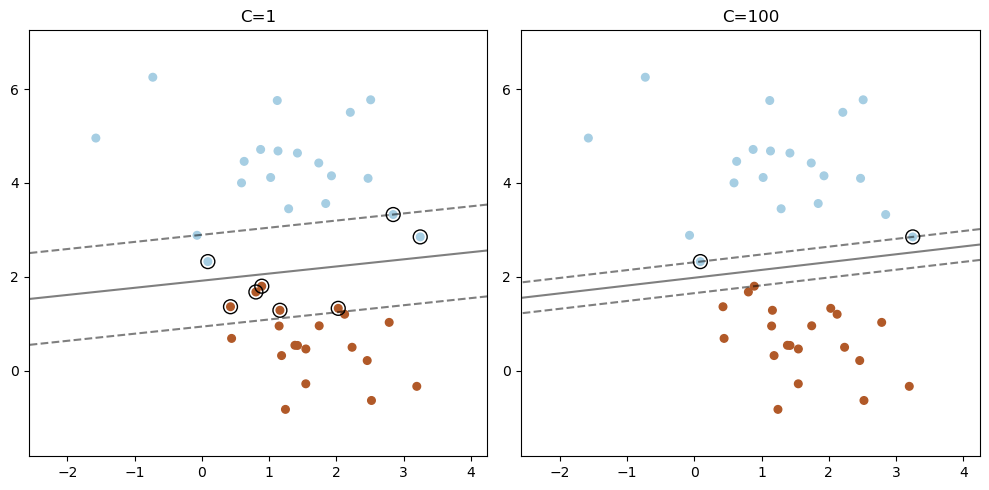

In [259]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

## Kernel Trick

The **kernel trick** is a key technique in Support Vector Machines (SVMs) that allows the algorithm to handle non-linear data. In its basic form, SVM works by finding a hyperplane that separates data points in a linear fashion. However, many real-world datasets are not linearly separable in their original feature space. This is where the kernel trick comes in.

The kernel trick enables SVM to transform the input data into a higher-dimensional space, where a linear separation is possible, without explicitly calculating the transformation. Instead, it uses a **kernel function** to compute the dot product between the data points in the transformed feature space.

#### How it Works:
1. **Feature Mapping**: The kernel function implicitly maps the original data points \(x \in \mathbb{R}^d\) into a higher-dimensional space \(\phi(x)\), where a linear separation might be possible. The transformation \(\phi(x)\) is often very complex and computationally expensive to compute directly.

2. **Kernel Function**: Instead of computing \(\phi(x)\) explicitly, SVM uses a kernel function \(K(x_i, x_j)\) that computes the dot product \(\langle \phi(x_i), \phi(x_j) \rangle\) in the higher-dimensional space. This allows the SVM to operate in the higher-dimensional space without ever having to compute the transformation explicitly, significantly reducing computational cost.

3. **Decision Boundary in Higher-Dimensional Space**: By using the kernel function, SVM can learn a non-linear decision boundary in the original space that corresponds to a linear hyperplane in the transformed space.

#### Common Kernel Functions:
There are several commonly used kernel functions, each suited to different types of data:

- **Linear Kernel**: 
  $$
  K(x_i, x_j) = \langle x_i, x_j \rangle
  $$

  This is used when the data is already linearly separable or the original feature space is sufficient.

- **Polynomial Kernel**:
  $$
  K(x_i, x_j) = (\gamma \langle x_i, x_j \rangle + r)^d
  $$

  This kernel allows for curved decision boundaries and is useful for data that requires polynomial separation.

- **Radial Basis Function (RBF) Kernel** (Gaussian Kernel):
  $$
  K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)
  $$

  This is the most commonly used kernel. It creates a decision boundary that can be highly flexible and is effective when there is no clear linear boundary.

- **Sigmoid Kernel**:
  $$
  K(x_i, x_j) = \tanh(\gamma \langle x_i, x_j \rangle + r)
  $$

  This kernel behaves similarly to neural networks with a sigmoid activation function.
  
#### Different Kernels Visualized:

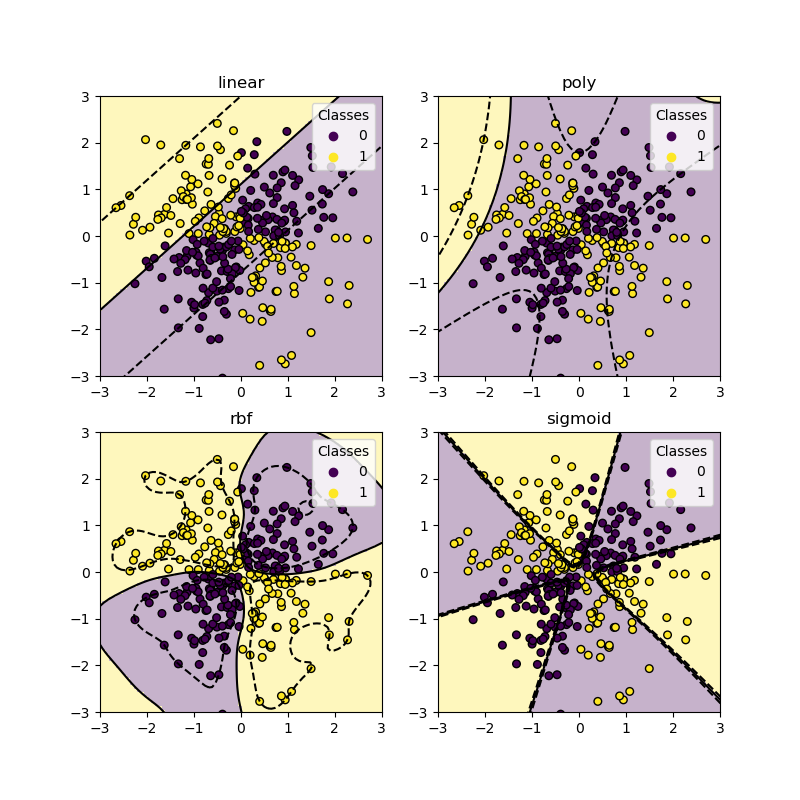

#### Advantages of the Kernel Trick:
- **Non-linear separability**: It allows SVM to classify data that is not linearly separable in the original feature space.
- **No explicit transformation**: The algorithm can operate in high-dimensional spaces without the need to explicitly calculate the coordinates of data points in that space, making it computationally efficient.
- **Flexibility**: By choosing an appropriate kernel function, SVM can model complex relationships between data points.

Consider data that is not separable by a straight line in a 2D plane. By applying a kernel function, the data is effectively projected into a higher-dimensional space where a linear separator (hyperplane) can be found. When this hyperplane is projected back to the original space, it becomes a non-linear boundary.


<div align = "center">
<iframe width="560" height="315" src="https://www.youtube.com/embed/Q7vT0--5VII?si=b3WiQOIJarLCLSkX" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</div>

Different kernels and parameter values can be seen in the interactive demo of Support Vector Mechines by Jonas Greitemann on ```https://greitemann.dev/svm-demo```.

### Implementation

In [260]:
linear_svc = SVC(kernel='linear')
linear_svc.kernel

'linear'

In [261]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

In [262]:
# Create SVM classifier with a linear kernel
clf = SVC(kernel='rbf', C=1.0, gamma='auto')

# Train the model
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [263]:
# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### Kernel Trick Example 1 -

#### Dataset Handling

In [272]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Use only two classes for binary classification
X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

# Shuffle data
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

# Split dataset into training and test sets
X_train = X[: int(0.9 * n_sample)]
y_train = y[: int(0.9 * n_sample)]
X_test = X[int(0.9 * n_sample) :]
y_test = y[int(0.9 * n_sample) :]

#### Model Fitting

In [ ]:
# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

#### Visualization

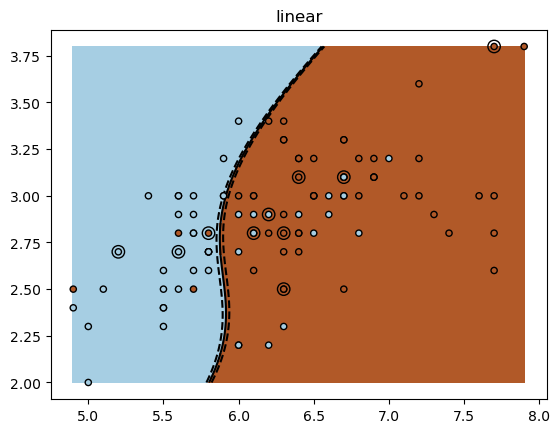

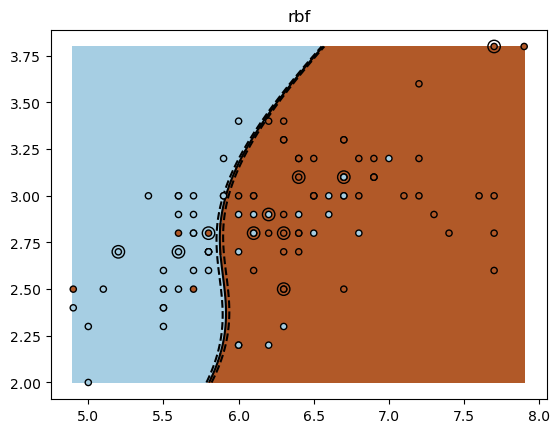

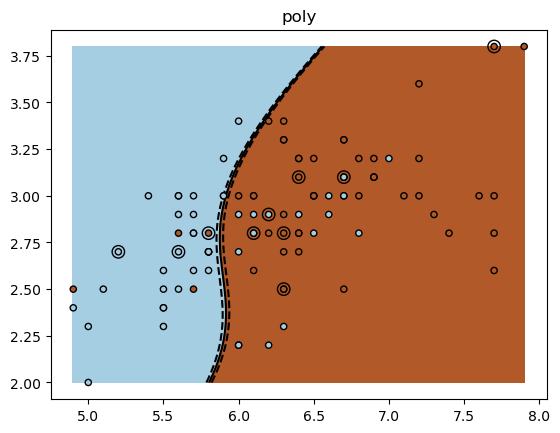

In [271]:
for kernel in ("linear", "rbf", "poly"):
    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

### Kernel Trick Example 2 -

#### Dataset Handling

In [266]:
# import some data to play with
iris = load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target



#### Model Fitting

In [273]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

models = (
    SVC(kernel="linear", C=C),
    LinearSVC(C=C, max_iter=10000),
    SVC(kernel="rbf", gamma=0.7, C=C),
    SVC(kernel="poly", degree=3, gamma="auto", C=C),
)

models = [clf.fit(X, y) for clf in models]

#### Visualization

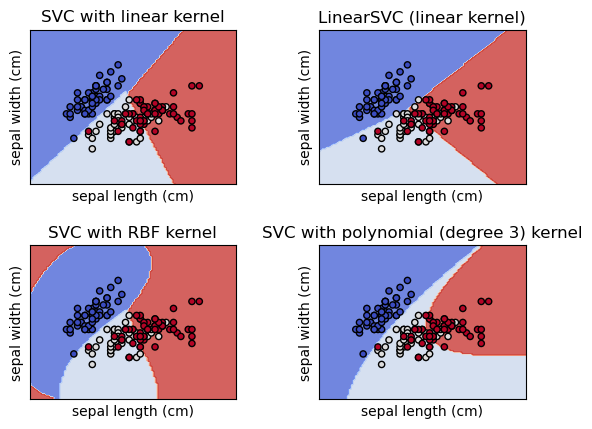

In [267]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [268]:
for model in models:
    # Predict the labels
    y_pred = model.predict(X)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y, y_pred)
    
    # Print the model type and its accuracy
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.2f}")

SVC Accuracy: 0.82
LinearSVC Accuracy: 0.80
SVC Accuracy: 0.83
SVC Accuracy: 0.81


For more examples, don't forget to visit official documentation of scikit-learn:

 ```https://scikit-learn.org/stable/auto_examples/svm/index.html```.

## Create Your Own Model Using Your Own Dataset

Go to ```https://drawdata.xyz/#scatterchart``` by Vincent D. Warmerdam and create your own dataset to play with different kernels using the SVM.